In [7]:
import os
import pandas as pd
import numpy as np
from src.my_settings import settings
from src.timecourse import extract_imagery_time_courses

In [ ]:
# Settings
sett = settings()
subject_list = sett["sub_labels"]
run_list = sett["run_labels"]
roi_string = "Amyg"  # A4ul, dIa, Amyg
n_subjects = len(subject_list)

In [ ]:
# Iterate over subjects and runs, extract timecourses, save in array
n_timepoints = 9
n_trials_per_run = 6

timecourses_nf_mi1 = np.zeros(
    (n_subjects * len(run_list) * n_trials_per_run, n_timepoints)
)
timecourses_nf_mi2 = np.zeros(
    (n_subjects * len(run_list) * n_trials_per_run, n_timepoints)
)
timecourses_sham_mi1 = np.zeros(
    (n_subjects * len(run_list) * n_trials_per_run, n_timepoints)
)
timecourses_sham_mi2 = np.zeros(
    (n_subjects * len(run_list) * n_trials_per_run, n_timepoints)
)

idx = 0

for subject in subject_list:
    print(f"Extracting timecourses for subject {subject}")
    for run in run_list:
        timecourse_nf_mi1, timecourse_nf_mi2 = extract_imagery_time_courses(
            subject, "nf", run, roi_string, n_timepoints
        )
        timecourse_sham_mi1, timecourse_sham_mi2 = extract_imagery_time_courses(
            subject, "sham", run, roi_string, n_timepoints
        )

        timecourses_nf_mi1[idx : idx + n_trials_per_run, :] = timecourse_nf_mi1
        timecourses_nf_mi2[idx : idx + n_trials_per_run, :] = timecourse_nf_mi2
        timecourses_sham_mi1[idx : idx + n_trials_per_run, :] = timecourse_sham_mi1
        timecourses_sham_mi2[idx : idx + n_trials_per_run, :] = timecourse_sham_mi2

        idx += n_trials_per_run

Extracting timecourses for subject 01
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Extracting timecourses for subject 02
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Extracting timecourses for subject 03
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Extracting timecourses for subject 04
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Extracting timecourses for subject 05
Found labels for Amyg: [211, 213, 212, 214]
Found labels for Amyg: [211, 213, 212, 214]
Found labels for A

In [10]:
timecourses_nf_mi1.shape

(264, 9)

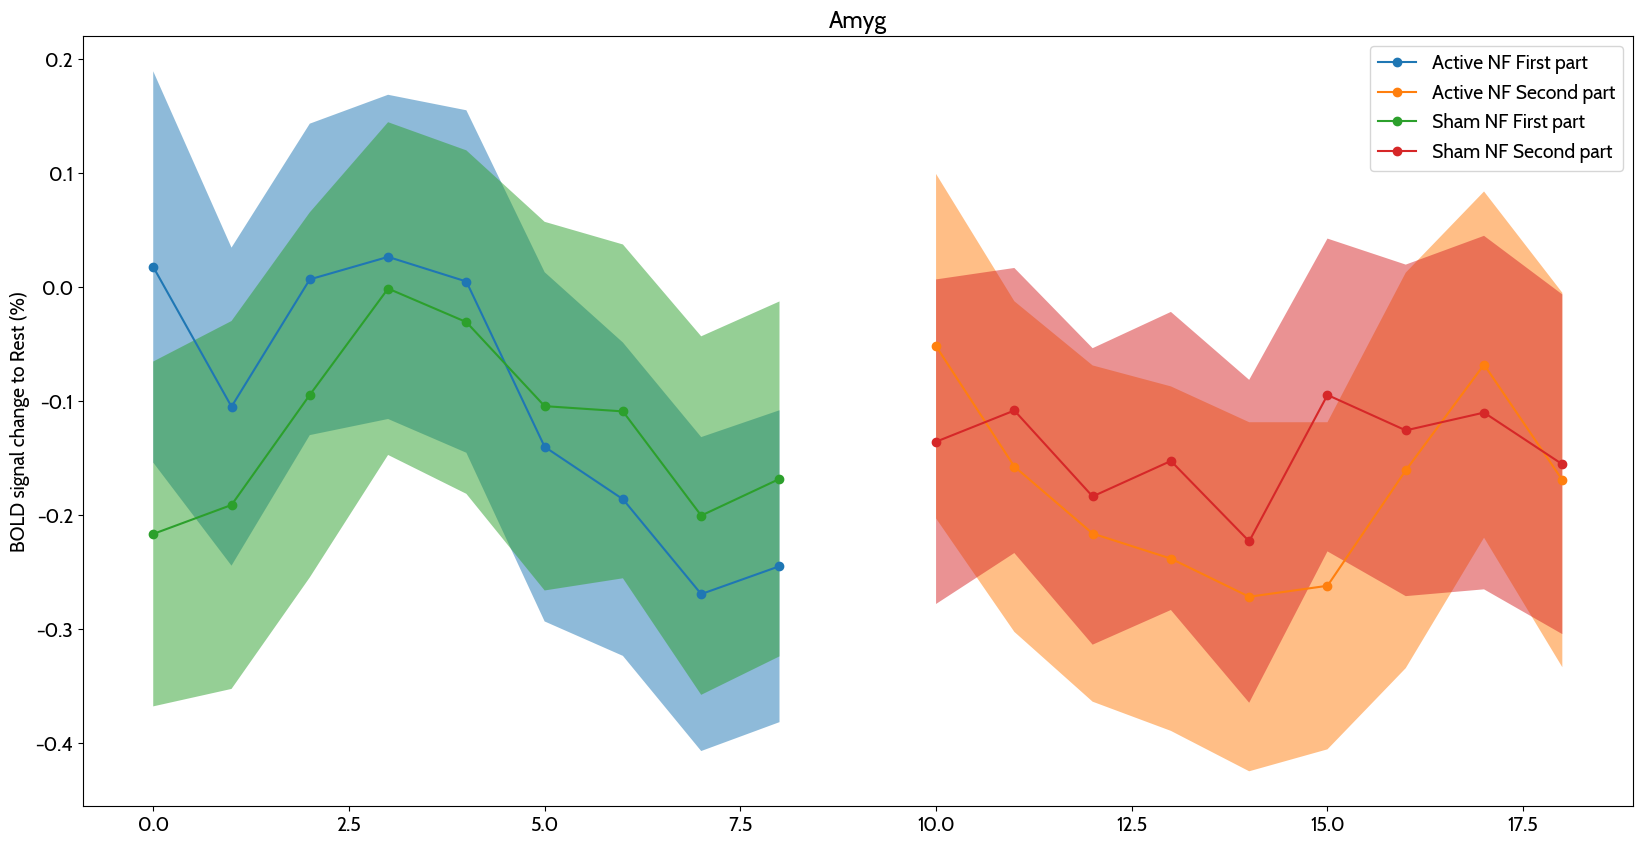

In [ ]:
# average across subjects and plot mean + SEM
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

mean_timecourse_nf_mi1 = np.nanmean(timecourses_nf_mi1, axis=0)
mean_timecourse_nf_mi2 = np.nanmean(timecourses_nf_mi2, axis=0)

std_timecourse_nf_mi1 = np.nanstd(timecourses_nf_mi1, axis=0) / np.sqrt(n_subjects)
std_timecourse_nf_mi2 = np.nanstd(timecourses_nf_mi2, axis=0) / np.sqrt(n_subjects)

mean_timecourse_sham_mi1 = np.nanmean(timecourses_sham_mi1, axis=0)
mean_timecourse_sham_mi2 = np.nanmean(timecourses_sham_mi2, axis=0)

std_timecourse_sham_mi1 = np.nanstd(timecourses_sham_mi1, axis=0) / np.sqrt(n_subjects)
std_timecourse_sham_mi2 = np.nanstd(timecourses_sham_mi2, axis=0) / np.sqrt(n_subjects)

# plot both

plt.plot(range(0, 9), mean_timecourse_nf_mi1, marker="o", label="Active NF First part")
plt.fill_between(
    range(mean_timecourse_nf_mi1.shape[0]),
    mean_timecourse_nf_mi1 - std_timecourse_nf_mi1,
    mean_timecourse_nf_mi1 + std_timecourse_nf_mi1,
    alpha=0.5,
)

plt.plot(
    range(10, 19), mean_timecourse_nf_mi2, marker="o", label="Active NF Second part"
)
plt.fill_between(
    range(10, 19),
    mean_timecourse_nf_mi2 - std_timecourse_nf_mi2,
    mean_timecourse_nf_mi2 + std_timecourse_nf_mi2,
    alpha=0.5,
)

plt.plot(mean_timecourse_sham_mi1, marker="o", label="Sham NF First part")
plt.fill_between(
    range(mean_timecourse_sham_mi1.shape[0]),
    mean_timecourse_sham_mi1 - std_timecourse_sham_mi1,
    mean_timecourse_sham_mi1 + std_timecourse_sham_mi1,
    alpha=0.5,
)

plt.plot(
    range(10, 19), mean_timecourse_sham_mi2, marker="o", label="Sham NF Second part"
)
plt.fill_between(
    range(10, 19),
    mean_timecourse_sham_mi2 - std_timecourse_sham_mi2,
    mean_timecourse_sham_mi2 + std_timecourse_sham_mi2,
    alpha=0.5,
)

plt.ylabel("BOLD signal change to Rest (%)")
plt.title(roi_string)
plt.legend()
plt.show()